# This is our notebook

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk, load_MLCup
from src.model import MLP
from src.Optimizers import HBG, CG
from src.GridSearch import GridSearch
from src.EarlyStopping import EarlyStopping

In [2]:
path = os.getcwd()
file_train = '/data/ML-CUP22-TR.csv'
file_test = '/data/ML-CUP22-TS.csv'

labels_train = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']
labels_test = ['x1','x2','x3','x4','x5','x6','x7','x8','x9']

X_train, y_train = load_MLCup(path + file_train, labels_train)
X_test = load_MLCup(path + file_test, labels_test)

### Grid Search

For each architecture, we find the set of parameters with best training objective.

HBG

In [1]:
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'max_epochs'

params_grid = {
    'alpha' : [0.01, 0.05, 0.1],
    'beta' : [0.7, 0.8, 0.9],
}

Shallow architecture

In [2]:
model = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = HBG(loss, regularization, stopping_criterion)

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)


NameError: name 'MLP' is not defined

Deep architecture

In [8]:
model = MLP([20, 40, 20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = HBG(loss, regularization, stopping_criterion)

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)

Grid search of 9 combinations.


100%|██████████| 9/9 [00:00<00:00, 10485.76it/s]




Parameters of best model, evaluated on training_objective: {'alpha': 0.05, 'beta': 0.8}
Validation error on 1 folds for best model: [1.629805108422595]
Mean validation error: 1.629805108422595


Linear NN (convex optimization)

In [12]:
params_grid = {
    'alpha' : [0.001, 0.005, 0.01], #smaller steps, otherwise we incur in gradient exploding
    'beta' : [0.7, 0.8, 0.9],
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'id')
optimizer = HBG(loss, regularization, stopping_criterion)

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)

Grid search of 9 combinations.


100%|██████████| 9/9 [00:00<00:00, 7479.44it/s]




Parameters of best model, evaluated on training_objective: {'alpha': 0.005, 'beta': 0.9}
Validation error on 1 folds for best model: [3.004868135048993]
Mean validation error: 3.004868135048993


CG

We perform a different grid search for each beta type

loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'max_epochs'

params_grid = {
    'm2' : [0.3, 0.4, 0.5],
    'm1' : [0.1, 0.2]
}

In [ ]:
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'max_epochs'

params_grid = {
    'm2' : [0.3, 0.4],
    'm1' : [0.1, 0.2]
}

Shallow architecture

Deep architecture

### Experiments

1.9713222209629437
1.9836124287757866
1.9907558172618915
2.026092588238008
2.0082368822407655
2.0835312676327704
2.087205111752333
2.0888215248607627
2.068310522869223
2.079409338202586
3.019632972513675
3.0195305925847835
3.0196950662727176
3.0195202239665275
3.019701419636923


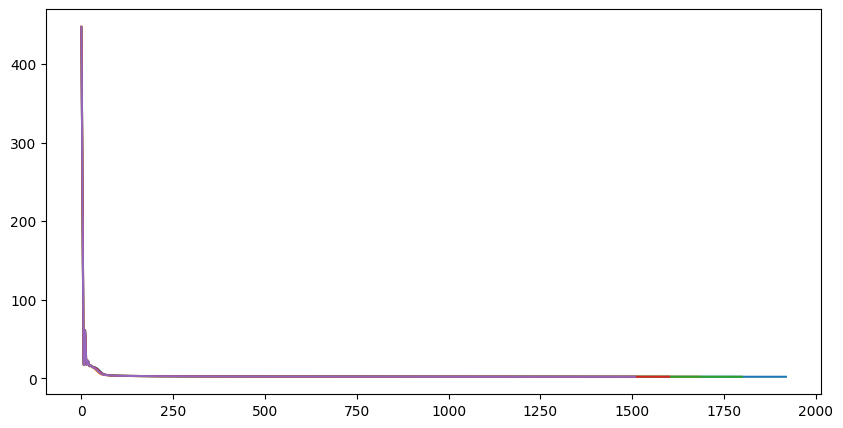

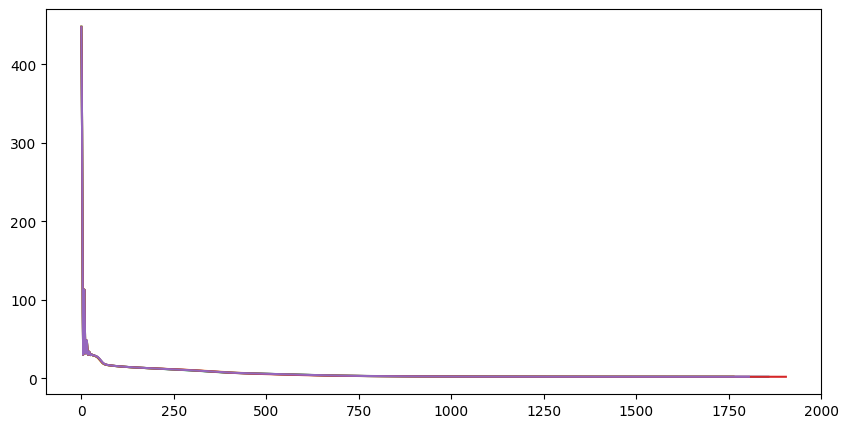

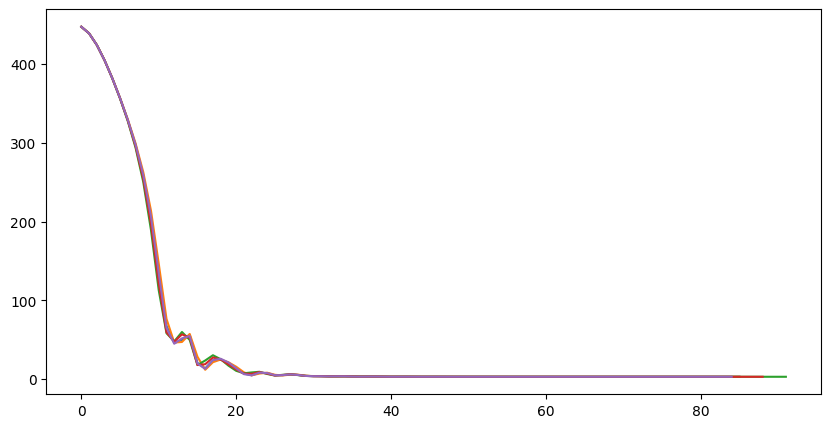

In [4]:
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'obj_tol'
verbose = False

early_stopping = EarlyStopping(mode = "obj_tol")

mlp_shallow = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
mlp_deep = MLP([60,10], 9, 2, task = "regression", activation_function = 'sigm')
mlp_linear = MLP([20], 9, 2, task = "regression", activation_function = 'id')

optimizer = HBG(loss = loss, regularization_function = regularization, stopping_criterion = stopping_criterion, early_stopping = early_stopping)

for mlp, alpha, beta in zip([mlp_shallow, mlp_deep, mlp_linear], [0.01, 0.05, 0.005], [0.8, 0.8, 0.9]):
    fig, ax = plt.subplots(1,1, figsize = (10,5))

    for i in range(5):
        mlp.initialize()
        optimizer.initialize(mlp, alpha = 0.01, beta = 0.8, stopping_value = 1e-3, alpha_l2 = 0.001, verbose = verbose)
        optimizer.fit_model(X_train, y_train)
        ax.plot(optimizer.obj_history, label = 'HBG objective function')
        print(np.min(optimizer.obj_history))
        print(optimizer.n_forward_backward)

Epoch 0 - Objective function: 447.5360616642547 - Gradient norm: 28.95519427872276
Epoch 1 - Objective function: 49.78340040257735 - Gradient norm: 19.72596686463404
Epoch 2 - Objective function: 19.39586204541688 - Gradient norm: 19.115811815187076
Epoch 3 - Objective function: 6.73517446133171 - Gradient norm: 4.386047163005334
Epoch 4 - Objective function: 5.308282656267353 - Gradient norm: 5.038204003319106
Epoch 5 - Objective function: 4.464060255426394 - Gradient norm: 4.336019482250988
Epoch 6 - Objective function: 4.002012316121773 - Gradient norm: 2.822264825178484
Epoch 7 - Objective function: 3.800327137297638 - Gradient norm: 3.059483550695294
Epoch 8 - Objective function: 3.601859390033752 - Gradient norm: 2.623933399671069
Epoch 9 - Objective function: 3.4963260991670797 - Gradient norm: 2.4792758978066516
Epoch 10 - Objective function: 3.3301922422482226 - Gradient norm: 3.1168143192742663
Epoch 11 - Objective function: 3.2081244402481013 - Gradient norm: 1.5919823378973

/Users/biancaziliotto/Desktop/Projects/HBG-CG_Analysis/Code/src/Optimizers.py:593: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = (alpha_m * phip_as - alpha_s * phip_am) / (phip_as - phip_am)


Epoch 16 - Objective function: 3.0696570003676347 - Gradient norm: 0.688071325356331
Epoch 17 - Objective function: 3.0548349141984694 - Gradient norm: 1.0491791108961426
Epoch 18 - Objective function: 3.03152692801231 - Gradient norm: 0.3467513635881158
Epoch 19 - Objective function: 3.0292981535228862 - Gradient norm: 0.27528810076256705
Epoch 20 - Objective function: 3.0281508660501495 - Gradient norm: 0.22791906577836235
Epoch 21 - Objective function: 3.02524847272955 - Gradient norm: 0.2065936072397339
Epoch 22 - Objective function: 3.024567818141091 - Gradient norm: 0.16753559491382364
Epoch 23 - Objective function: 3.023936797781231 - Gradient norm: 0.13752317178523138
Epoch 24 - Objective function: 3.023534750769327 - Gradient norm: 0.13807558786261442
Epoch 25 - Objective function: 3.0232710336753468 - Gradient norm: 0.07993502256233814
Epoch 26 - Objective function: 3.0230629597112086 - Gradient norm: 0.08718471763481352
Epoch 27 - Objective function: 3.0229524764643667 - Gra

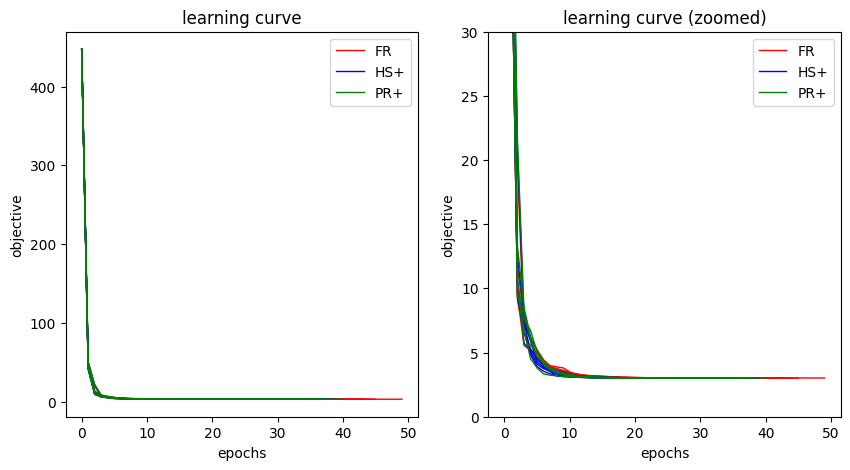

In [9]:
alpha_l2 = 0.001
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'obj_tol'
verbose = False

early_stopping = EarlyStopping(mode = "obj_tol")

mlp_shallow = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
mlp_deep = MLP([60, 10], 9, 2, task = "regression", activation_function = 'sigm')
mlp_very_deep = MLP([40, 20, 10], 9, 2, task = "regression", activation_function = 'sigm')
mlp_linear = MLP([20], 9, 2, task = "regression", activation_function = 'id')

beta_color = {'FR' : 'r', 'HS+' : 'b', 'PR+' : 'g'}

for mlp in [mlp_shallow, mlp_deep, mlp_very_deep, mlp_linear]:
    
    fig, ax = plt.subplots(1,2, figsize = (10,5))

    for beta in ['FR', 'HS+', 'PR+']: 

        for i in range(5):

            mlp.initialize(random_seed=i)
            optimizer = CG(loss, regularization, stopping_criterion, early_stopping)
            optimizer.initialize(mlp, stopping_value = 1e-3, batch_size = -1, alpha_l1 = 0, alpha_l2 = alpha_l2, verbose = verbose,
                   beta_type = beta, m1 = 0.25, m2 = 0.4, MaxFeval = 100, tau = 0.8, delta = 1e-12, eps = 1e-6, sfgrd = 0.2)
            optimizer.fit_model(X_train, y_train)
            line, = ax[0].plot(optimizer.obj_history, beta_color[beta], linewidth = 1)
            line_zoom, = ax[1].plot(optimizer.obj_history, beta_color[beta], linewidth = 1)
            if i == 0:
                line.set_label(beta)
                line_zoom.set_label(beta)
            ax[1].set_ylim(0,30)
            print(np.min(optimizer.obj_history))

    ax[0].legend()
    ax[1].legend()

    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("objective")
    ax[0].set_title("learning curve")
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("objective")
    ax[1].set_title("learning curve (zoomed)")

Epoch 0 - Objective function: 446.78290919023743 - Gradient norm: 53.87206204621509
Epoch 1 - Objective function: 61.47353467241564 - Gradient norm: 72.74970511165803
Epoch 2 - Objective function: 30.21621281526039 - Gradient norm: 6.097266827438512
Epoch 3 - Objective function: 29.651673816738214 - Gradient norm: 5.249017296053117
Epoch 4 - Objective function: 21.935239305918184 - Gradient norm: 12.253783329377452
Epoch 5 - Objective function: 18.562386920661602 - Gradient norm: 5.382011808884639
Epoch 6 - Objective function: 17.929455546333628 - Gradient norm: 6.817413338843044
Epoch 7 - Objective function: 16.536159313535812 - Gradient norm: 1.8492782238324017
Epoch 8 - Objective function: 16.4304161241375 - Gradient norm: 2.24300883866474
Epoch 9 - Objective function: 15.283149819291008 - Gradient norm: 2.5562692770830364
Epoch 10 - Objective function: 14.318170902309493 - Gradient norm: 1.8435960887067597
Epoch 11 - Objective function: 13.997498030813954 - Gradient norm: 0.9297961

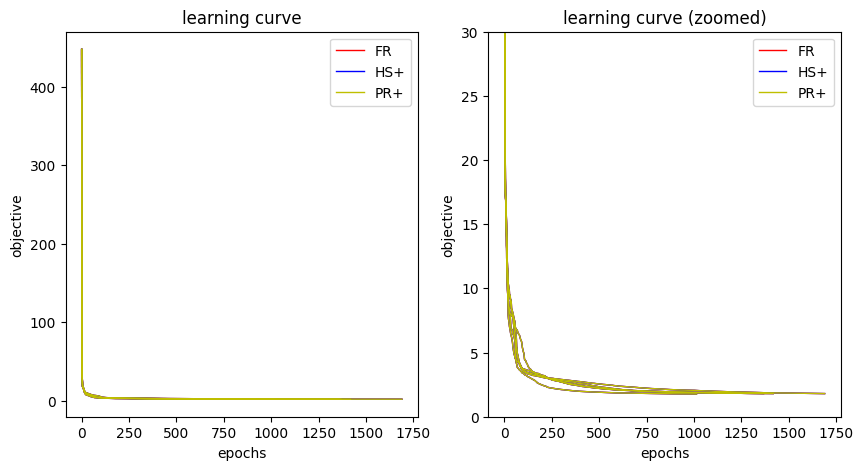

In [6]:
alpha_l2 = 0.001
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'obj_tol'
verbose = True

early_stopping = EarlyStopping(mode = "obj_tol")

mlp_shallow = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
mlp_deep = MLP([60, 10], 9, 2, task = "regression", activation_function = 'sigm')
mlp_linear = MLP([20], 9, 2, task = "regression", activation_function = 'id')

beta_color = {'FR' : 'r', 'HS+' : 'b', 'PR+' : 'g'}

for mlp in [mlp_shallow, mlp_deep, mlp_linear]:
    
    fig, ax = plt.subplots(1,2, figsize = (10,5))

    for beta in ['FR', 'HS+', 'PR+']: 

        for i in range(5):

            mlp.initialize(random_seed=i)
            optimizer = CG(loss, regularization, stopping_criterion, early_stopping)
            optimizer.initialize(mlp, stopping_value = 1e-3, batch_size = -1, alpha_l1 = 0, alpha_l2 = alpha_l2, verbose = verbose,
                   beta_type = beta, m1 = 0.25, m2 = 0.4, MaxFeval = 100, tau = 0.5, delta = 1e-12, eps = 1e-6, sfgrd = 0.2)
            optimizer.fit_model(X_train, y_train)
            line, = ax[0].plot(optimizer.obj_history, beta_color[beta], linewidth = 1)
            line_zoom, = ax[1].plot(optimizer.obj_history, beta_color[beta], linewidth = 1)
            if i == 0:
                line.set_label(beta)
                line_zoom.set_label(beta)
            ax[1].set_ylim(0,30)
            print(np.min(optimizer.obj_history))
            print(optimizer.n_forward_backward)

    ax[0].legend()
    ax[1].legend()

    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("objective")
    ax[0].set_title("learning curve")
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("objective")
    ax[1].set_title("learning curve (zoomed)")